# Handwritten Sales Transaction Recognition

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


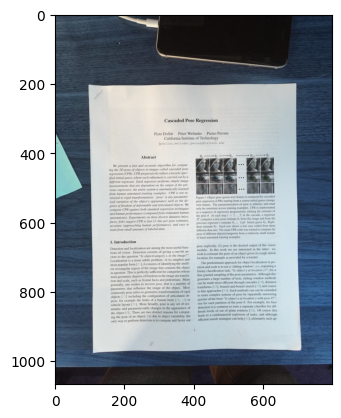

In [15]:
# Load image
# image = cv2.imread('samples/jibu-handwritten-sales-1.jpg')
image = cv2.imread('samples/scan-paper.jpg')

height, width = image.shape[:2]

# display the image
plt.imshow(image)
plt.show()

## Identifying Borders

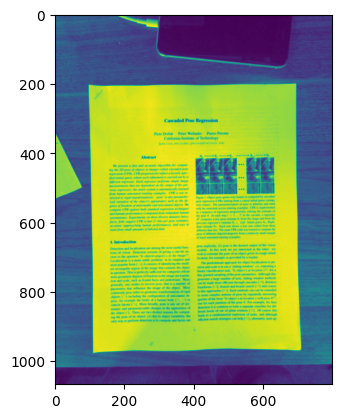

In [16]:
# Step 1: Preprocessing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# display the image
plt.imshow(blurred)
plt.show()

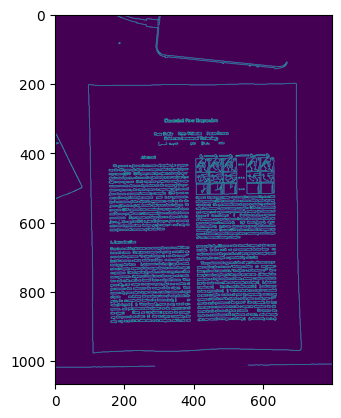

In [17]:
# Step 2: Edge Detection
edges = cv2.Canny(blurred, 75, 150)

# display the image
plt.imshow(edges)
plt.show()

In [18]:
# Step 3: Contour Detection
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]

# Step 4: Corner Detection
for c in contours:
    epsilon = 0.02 * cv2.arcLength(c, True)
    corners = cv2.approxPolyDP(c, epsilon, True)
    if len(corners) == 4:
        document_corners = corners
        break

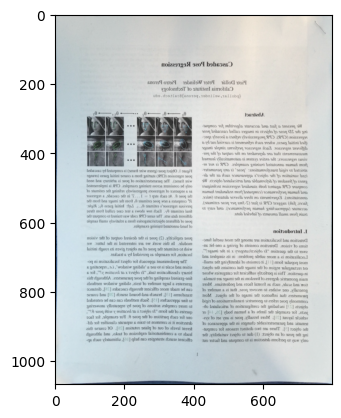

In [19]:
# Step 5: Perspective Transformation
dst = np.array([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]], dtype="float32")
M = cv2.getPerspectiveTransform(document_corners.reshape(4, 2).astype("float32"), dst)
warped = cv2.warpPerspective(image, M, (width, height))

# display the image
plt.imshow(warped)
plt.show()